# Session 6: Bayesian Regression 
## *Bayesian Treatment of Linear Regression*

### Haiping Lu -  COM4509/6509 MLAI2018

### Based on slides by Neil D. Lawrence MLAI2015 version

### Review  - Session 5 (VIS)
- Introduced important ML concepts: **overfitting** and **generalisation** [Watch (by ML grand master): Machine Learning A Cappella - Overfitting Thriller!](https://www.youtube.com/watch?v=DQWI1kvmwRg)
- Explained the difference between extrapolation and interpolation, and how to choose validation set respectively
- Examined the bias variance decomposition and trade-off
- Showed how to evaluate prediction models (estimate risk) by **cross validation (CV)**: LOO, $k$-fold, hold out.

### Overview - Session 6
- Another important ML concept: **Bayesian** [Watch (by statistician): The Fifth Moment -- I Think I'm A Bayesian](https://www.youtube.com/watch?v=JmSKam4BCvU) <img src="http://www.dcs.shef.ac.uk/people/H.Lu/files/Teaching/ChurchBayesianTwitter.png" alt="Bayesian religion" style="width:300px;"/>
- **Bayesian** treatment/approach: placing a probability distribution (_prior_ density) over the model parameters for their probabilistic interpretation
- **Bayesian** regression: Bayesian treatment of linear regression (model parameters)
- Key **Bayesian** concepts: prior, posterior, likelihood, marginal likelihood, Bayes' rule, marginalisation

### Note by Haiping
- Headings marked as <span style="color:red">*optional*</span> are background / more challenging info for your interest, which can be safely skipped if you would like to be more focused on the core / essentials and have less interest in the background / more advanced materials.

In [1]:
import pods
import mlai
import numpy as np
import matplotlib.pyplot as plt
import teaching_plots as plot
%matplotlib inline

from ipywidgets import *
def display_plots(filebase, directory=None, width=700, height=500, **kwargs):
    """Display a series of plots controlled by sliders. The function relies on Python string format functionality to index through a series of plots."""
    def show_figure(filebase, directory, **kwargs):
        """Helper function to load in the relevant plot for display."""
        filename = filebase.format(**kwargs)
        if directory is not None:
            filename = directory + '/' + filename           
        display(HTML("<img src='{filename}'>".format(filename=filename)))
        
    interact(show_figure, filebase=fixed(filebase), directory=fixed(directory), **kwargs)

### Two Simultaneous Equations

A system of two simultaneous equations with two
unknowns.

$$\begin{aligned}
        y_1 = & mx_1 + c\\
        y_2 = & mx_2 + c
      \end{aligned}$$ 
      
$$\begin{aligned}
        y_1-y_2 = & m(x_1 - x_2)
      \end{aligned}$$  
      
$$\begin{aligned}
        \frac{y_1-y_2}{x_1 - x_2} = & m
      \end{aligned}$$ 
      
$$\begin{aligned}
        m & =\frac{y_2-y_1}{x_2 - x_1}\\
        c & = y_1 - m x_1
      \end{aligned}$$    
      
### Underdetermined System
- What about two unknowns and *one* observation?
    $$y_1 =  mx_1 + c$$      

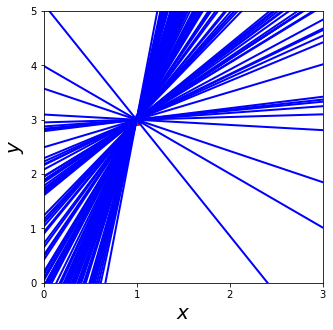

In [2]:
plot.under_determined_system()

In [3]:
display_plots('under_determined_system{samp:0>3}.svg', directory='./diagrams', samp=(0, 10))

interactive(children=(IntSlider(value=5, description='samp', max=10), Output()), _dom_classes=('widget-interac…

- We can compute $m$ given $c$.
$$m = \frac{y_1 -c}{x}$$

- Or we can compute $m$ given $c$.

Assume 
$$c \sim \mathcal{N}(0, 4),$$

### Overdetermined System

-   With two unknowns and two observations: 
    $$\begin{aligned}
          y_1 = & mx_1 + c\\
          y_2 = & mx_2 + c
        \end{aligned}$$

-   Additional observation leads to *overdetermined* system.
    $$y_3 =  mx_3 + c$$

-   This problem is solved through a noise model
    $\epsilon \sim \mathcal{N}(0,\sigma^2)$ $$\begin{aligned}
          y_1 = mx_1 + c + \epsilon_1\\
          y_2 = mx_2 + c + \epsilon_2\\
          y_3 = mx_3 + c + \epsilon_3
        \end{aligned}$$

### Noise Models

-   Motivation: Simple linear models are not modeling entire system.

-   Noise model gives *mismatch* between model and data.

-   Gaussian model is justified by appeal to central limit theorem.

-   Other models also possible (Student-$t$ for heavy tails).

-   Maximum likelihood with Gaussian noise leads to *least squares*.

### Different Types of Uncertainty (<span style="color:red">*optional*</span>)

-   The first type of uncertainty we are assuming is
    *aleatoric* uncertainty.

-   The second type of uncertainty we are assuming is
    *epistemic* uncertainty.

### Aleatoric Uncertainty  (<span style="color:red">*optional*</span>)

-   This is uncertainty we couldn’t know even if we wanted to. e.g. the
    result of a football match before it’s played.

-   Where a sheet of paper might land on the floor.

### Epistemic Uncertainty  (<span style="color:red">*optional*</span>)

-   This is uncertainty we could in principal know the answer too. We
    just haven’t observed enough yet, e.g. the result of a football
    match *after* it’s played.

-   What colour socks your lecturer is wearing.

### Reading

-   @Bishop:book06 Section 1.2.3 (pg 21–24).

-   @Bishop:book06 Section 1.2.6 (start from just past eq 1.64
    pg 30-32).

-   @Rogers:book11 use an example of a coin toss for introducing
    Bayesian inference Chapter 3, Sections 3.1-3.4 (pg 95-117). Although
    you also need the beta density which we haven’t yet discussed. This
    is also the example that @Laplace:memoire74 used.

<!-- -->

-   Bayesian Inference

    -   @Rogers:book11 use an example of a coin toss for introducing
        Bayesian inference Chapter 3, Sections 3.1-3.4 (pg 95-117).
        Although you also need the beta density which we haven’t
        yet discussed. This is also the example that
        @Laplace:memoire74 used.

    -   @Bishop:book06 Section 1.2.3 (pg 21–24).

    -   @Bishop:book06 Section 1.2.6 (start from just past eq 1.64
        pg 30-32).

## Bayesian Inference in the Univariate Case

### Prior Distribution

-   Bayesian inference requires a prior on the parameters.

-   The prior represents your belief *before* you see the data of the
    likely value of the parameters.

-   For linear regression, consider a Gaussian prior on the intercept:
    $$c \sim \mathcal{N}(0, \alpha_1)$$

### Posterior Distribution

-   Posterior distribution is found by combining the prior with
    the likelihood.

-   Posterior distribution is your belief *after* you see the data of
    the likely value of the parameters.

-   The posterior is found through **Bayes’ Rule**
    $$p(c|y) = \frac{p(y|c)p(c)}{p(y)}$$
    ${p(c)}$: prior
    
    ${p(y|c)}$: likelihood
    
    ${p(y)}$: marginal likelihood
    
    ${p(c|y)}$: posterior


### Bayes Update

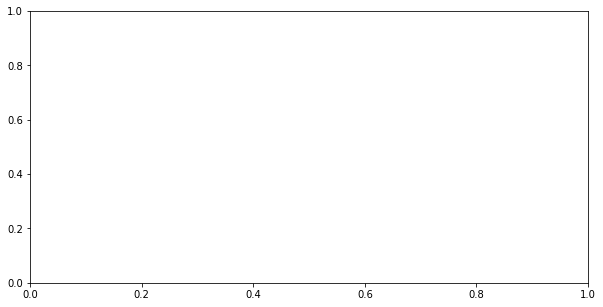

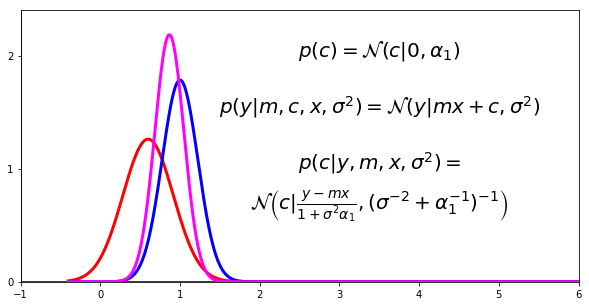

In [4]:
plot.bayes_update()

In [5]:
display_plots('dem_gaussian{stage:0>2}.svg', './diagrams', stage=(1, 3))

interactive(children=(IntSlider(value=2, description='stage', max=3, min=1), Output()), _dom_classes=('widget-…

### Stages to Derivation of the Posterior

-   Multiply likelihood by prior

    -   They are "exponentiated quadratics", the answer is always also
        an exponentiated quadratic because
        $$\exp(a^2)\exp(b^2) = \exp(a^2 + b^2)$$

-   Complete the square to get the resulting density in the form of
    a Gaussian.

-   Recognise the mean and (co)variance of the Gaussian. This is the
    estimate of the posterior.

### Main Trick

$$p(c) = \frac{1}{\sqrt{2\pi\alpha_1}} \exp\left(-\frac{1}{2\alpha_1}c^2\right)$$
$$p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2) = \frac{1}{\left(2\pi\sigma^2\right)^{\frac{n}{2}}} \exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n(y_i - mx_i - c)^2\right)$$

$$p(c| \mathbf{y}, \mathbf{x}, m, \sigma^2) = \frac{p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2)p(c)}{p(\mathbf{y}|\mathbf{x}, m, \sigma^2)}$$

$$p(c| \mathbf{y}, \mathbf{x}, m, \sigma^2) =  \frac{p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2)p(c)}{\int p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2)p(c) \text{d} c}$$

$$p(c| \mathbf{y}, \mathbf{x}, m, \sigma^2) \propto  p(\mathbf{y}|\mathbf{x}, c, m, \sigma^2)p(c)$$

$$\begin{aligned}
    \log p(c | \mathbf{y}, \mathbf{x}, m, \sigma^2) =&-\frac{1}{2\sigma^2} \sum_{i=1}^n(y_i-c - mx_i)^2-\frac{1}{2\alpha_1} c^2 + \text{const}\\
     = &-\frac{1}{2\sigma^2}\sum_{i=1}^n(y_i-mx_i)^2 -\left(\frac{n}{2\sigma^2} + \frac{1}{2\alpha_1}\right)c^2\\
    & + c\frac{\sum_{i=1}^n(y_i-mx_i)}{\sigma^2},
  \end{aligned}$$

complete the square of the quadratic form to obtain
$$\log p(c | \mathbf{y}, \mathbf{x}, m, \sigma^2) = -\frac{1}{2\tau^2}(c - \mu)^2 +\text{const},$$
where $\tau^2 = \left(n\sigma^{-2} +\alpha_1^{-1}\right)^{-1}$
and
$\mu = \frac{\tau^2}{\sigma^2} \sum_{i=1}^n(y_i-mx_i)$.



## The Joint Density -  Two-Dimensional Gaussian

### Height and Weight Models (2D Gaussian)

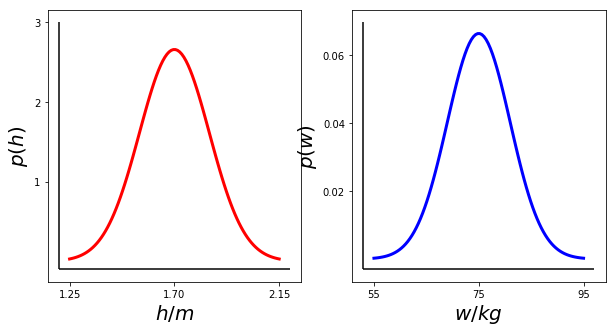

In [6]:
plot.height_weight()

###  Sampling Two Independent Dimensional Variables

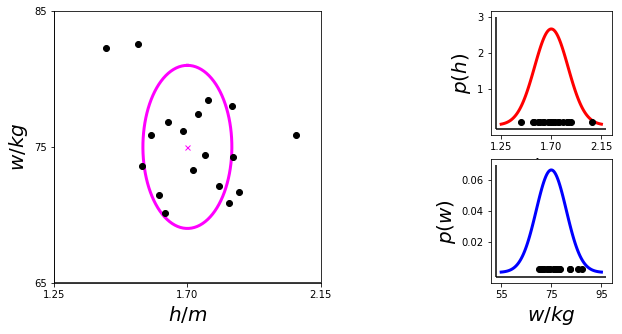

In [7]:
plot.independent_height_weight()

In [8]:
display_plots('independent_height_weight{fig:0>3}.png', './diagrams', fig=(0, 79))


interactive(children=(IntSlider(value=39, description='fig', max=79), Output()), _dom_classes=('widget-interac…

### Independence Assumption

- This assumes height and weight are independent.
    $$
    p(h, w) = p(h)p(w)
    $$
- In reality they are dependent (body mass index) $= \frac{w}{h^2}$.


### Sampling Two Dependent Dimensional Variables


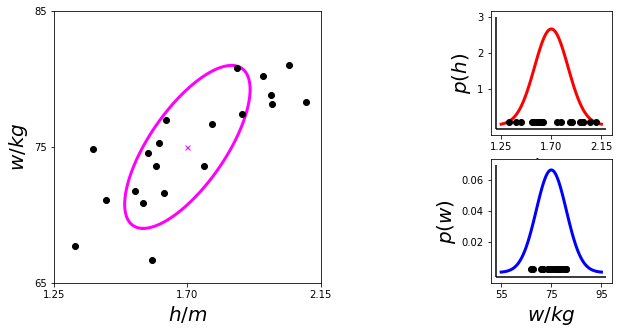

In [9]:
plot.correlated_height_weight()

In [10]:
display_plots('correlated_height_weight{fig:0>3}.png', './diagrams', fig=(0, 79))

interactive(children=(IntSlider(value=39, description='fig', max=79), Output()), _dom_classes=('widget-interac…

### Independent Gaussians (2D)

$$p(w, h) = p(w)p(h)$$ 
$$p(w, h) = \frac{1}{\sqrt{2\pi \sigma_1^2}\sqrt{2\pi\sigma_2^2}} \exp\left(-\frac{1}{2}\left(\frac{(w-\mu_1)^2}{\sigma_1^2} + \frac{(h-\mu_2)^2}{\sigma_2^2}\right)\right)$$

### Independent Gaussians (rewritten in vector form)
$$p(w, h) = \frac{1}{\sqrt{2\pi\sigma_1^2 2\pi\sigma_2^2}} \exp\left(-\frac{1}{2}\left(\begin{bmatrix}w \\ h\end{bmatrix} - \begin{bmatrix}\mu_1 \\ \mu_2\end{bmatrix}\right)^\top\begin{bmatrix}\sigma_1^2& 0\\0&\sigma_2^2\end{bmatrix}^{-1}\left(\begin{bmatrix}w \\ h\end{bmatrix} - \begin{bmatrix}\mu_1 \\ \mu_2\end{bmatrix}\right)\right)$$

### Independent Gaussians (rewritten in vector/matrix notation)
$$p(\mathbf{y}) = \frac{1}{\left|2\pi \mathbf{D}\right|^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\mathbf{y} - \boldsymbol{\mu})^\top\mathbf{D}^{-1}(\mathbf{y} - \boldsymbol{\mu})\right)$$

### From Independent (uncorrelated) Gaussian to Correlated Gaussian

[Read: Correlation and dependence](https://en.wikipedia.org/wiki/Correlation_and_dependence): Uncorrelatedness is equivalent to independence for jointly normal variables.

Form correlated from original by rotating the data space using [rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix)
$\mathbf{R}$.


$$p(\mathbf{y}) = \frac{1}{\left|2\pi\mathbf{D}\right|^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\mathbf{y} - \boldsymbol{\mu})^\top\mathbf{D}^{-1}(\mathbf{y} - \boldsymbol{\mu})\right)$$

Multiply the data by a rotation matrix $\mathbf{R}$

$$p(\mathbf{y}) = \frac{1}{\left|2\pi\mathbf{D}\right|^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\mathbf{R}^\top\mathbf{y} - \mathbf{R}^\top\boldsymbol{\mu})^\top\mathbf{D}^{-1}(\mathbf{R}^\top\mathbf{y} - \mathbf{R}^\top\boldsymbol{\mu})\right)$$

Collect $\mathbf{R}$ to the left and right of $\mathbf{D}$

$$p(\mathbf{y}) = \frac{1}{\left|2\pi\mathbf{D}\right|^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\mathbf{y} - \boldsymbol{\mu})^\top\mathbf{R}\mathbf{D}^{-1}\mathbf{R}^\top(\mathbf{y} - \boldsymbol{\mu})\right)$$
Let
$$\mathbf{C}^{-1} = \mathbf{R} \mathbf{D}^{-1} \mathbf{R}^\top$$

Rewritten in typical Guassian form

$$p(\mathbf{y}) = \frac{1}{\left|{2\pi\mathbf{C}}\right|^{\frac{1}{2}}} \exp\left(-\frac{1}{2}(\mathbf{y} - \boldsymbol{\mu})^\top\mathbf{C}^{-1} (\mathbf{y} - \boldsymbol{\mu})\right)$$
This gives a **covariance matrix** for correlated variables (the general case):
$$\mathbf{C} = \mathbf{R} \mathbf{D} \mathbf{R}^\top$$

Note $\left|{\mathbf{C}}\right|=\left|{\mathbf{D}}\right|$, see [Determinant of Matrix Product](https://proofwiki.org/wiki/Determinant_of_Matrix_Product)

Practical multivariate data are correlated. Thus, we can rotate the axis to make the new, transformed data uncorrelated. This is exactly what Principal Component Analysis is doing, which is the topic of the next Session. In the assigment, you will deal with correlated Gaussians. And we need to determine the mean $\boldsymbol{\mu}$ and the covariance $\mathbf{C}$, instead of the mean and variance in the univariate case.

### Reading

-   Section 2.3 of @Bishop:book06 up to top of pg 85
    (multivariate Gaussians).

-   Section 3.3 of @Bishop:book06 up to 159 (pg 152–159).

### Revisit Olympics Data

-   Use Bayesian approach on olympics data with polynomials.

-   Choose a prior
    $\mathbf{w} \sim \mathcal{N}(\mathbf{0},\alpha \mathbf{I})$ with
    $\alpha = 1$.

-   Choose noise variance $\sigma^2 = 0.01$

### Sampling the Prior

-   Always useful to perform a ‘sanity check’ and sample from the prior
    before observing the data.

-   Since $\mathbf{y} = \boldsymbol{\Phi} \mathbf{w} + \boldsymbol{\epsilon}$
    just need to sample $$w \sim \mathcal{N}(0,\alpha)$$
    $$\boldsymbol{\epsilon} \sim \mathcal{N}(\mathbf{0},\sigma^2)$$ with
    $\alpha=1$ and $\sigma^2 = 0.01$.

In [5]:

basis = mlai.polynomial
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']
num_data = x.shape[0]

data_limits = [1892, 2020]

max_basis = y.shape[0]

Acquiring resource: olympic_marathon_men

Details of data: 
Olympic mens' marathon gold medal winning times from 1896 to 2012. Time given in pace (minutes per kilometer). Data is originally downloaded and collated from Wikipedia, we are not responsible for errors in the data

After downloading the data will take up 584 bytes of space.

Data will be stored in /Users/xavier/ods_data_cache/olympic_marathon_men.

Do you wish to proceed with the download? [yes/no]
yes
[==============================]   0.001/0.001MB                                                


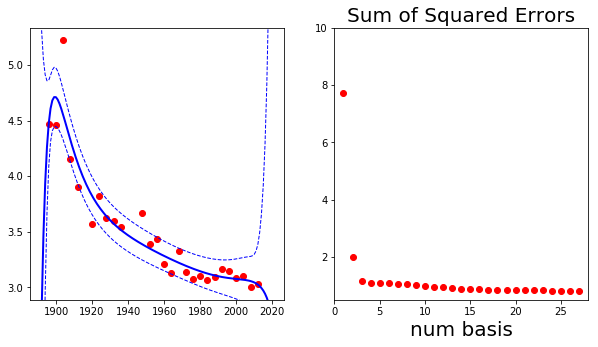

In [6]:
plot.rmse_fit(x, y, param_name='num_basis', param_range=(1, max_basis+1),  
              model=mlai.BLM, basis=basis, alpha=1, sigma2=0.04, data_limits=data_limits,
              xlim=data_limits, objective_ylim=[0.5,10])

### Olympic Data with Bayesian Polynomials

In [7]:

display_plots('olympic_BLM_polynomial_num_basis{num_basis:0>3}.svg', 
                            directory='./diagrams', num_basis=(1, max_basis))

interactive(children=(IntSlider(value=14, description='num_basis', max=27, min=1), Output()), _dom_classes=('w…

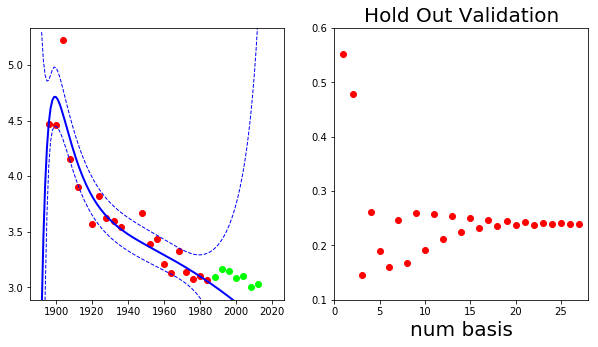

In [8]:
plot.holdout_fit(x, y, param_name='num_basis', param_range=(1, max_basis+1),  
              model=mlai.BLM, basis=basis, alpha=1, sigma2=0.04, data_limits=data_limits,
              xlim=data_limits, objective_ylim=[0.1,0.6], permute=False)

### Hold Out Validation

In [9]:
display_plots('olympic_val_BLM_polynomial_num_basis{num_basis:0>3}.svg', 
                            directory='./diagrams', num_basis=(1, 27))

interactive(children=(IntSlider(value=14, description='num_basis', max=27, min=1), Output()), _dom_classes=('w…

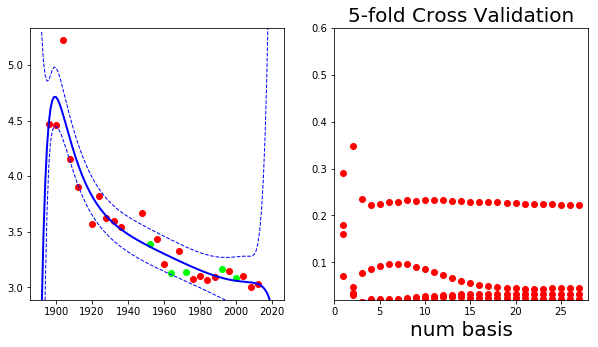

In [10]:
num_parts=5
plot.cv_fit(x, y, param_name='num_basis', param_range=(1, max_basis+1),  
              model=mlai.BLM, basis=basis, alpha=1, sigma2=0.04, data_limits=data_limits,
              xlim=data_limits, objective_ylim=[0.02,0.6], num_parts=num_parts)

### 5-fold Cross Validation

In [11]:
display_plots('olympic_5cv{part:0>2}_BLM_polynomial_num_basis{num_basis:0>3}.svg', 
                            directory='./diagrams', part=(0, 5), num_basis=(1, max_basis))

interactive(children=(IntSlider(value=2, description='part', max=5), IntSlider(value=14, description='num_basi…

## Model Fit: Bayesian vs Maximum Likelihood

-   Marginal likelihood doesn’t always increase as model
    order increases.

-   Presented Bayesian model has 2 parameters, regardless of how many basis
    functions (and here we didn’t even fit them).

-   Maximum likelihood model over fits through increasing number
    of parameters.

-   Revisit maximum likelihood solution with validation set.

### Regularized Mean

-   Validation fit here based on mean solution for
    $\mathbf{w}$ only.

-   For Bayesian solution
    $$\boldsymbol{\mu}_w = \left[\sigma^{-2}\boldsymbol{\Phi}^\top\boldsymbol{\Phi} + \alpha^{-1}\mathbf{I}\right]^{-1} \sigma^{-2} \boldsymbol{\Phi}^\top \mathbf{y}$$
    maximum likelihood solution
    $$\mathbf{w}^* = \left[\boldsymbol{\Phi}^\top\boldsymbol{\Phi}\right]^{-1} \boldsymbol{\Phi}^\top \mathbf{y}$$

-   Two are equivalent when $\alpha \rightarrow \infty$.

-   Equivalent to a prior for $\mathbf{w}$ with infinite variance.

-   In other cases $\alpha \mathbf{I}$ *regularizes* the system (keeps
    parameters smaller).

### Sampling the Posterior

-   Now check samples by extracting $\mathbf{w}$ from the
    *posterior*.

-   Now for $\mathbf{y} = \boldsymbol{\Phi} \mathbf{w} + \boldsymbol{\epsilon}$
    need
    $$w \sim \mathcal{N}(\boldsymbol{\mu}_w,\mathbf{C}_w)$$
    with
    $\mathbf{C}_w = \left[\sigma^{-2}\boldsymbol{\Phi}^\top \boldsymbol{\Phi} + \alpha^{-1} \mathbf{I}\right]^{-1}$
    and
    $\boldsymbol{\mu}_w =\mathbf{C}_w \sigma^{-2} \boldsymbol{\Phi}^\top \mathbf{y}$
    $$\boldsymbol{\epsilon} \sim \mathcal{N}(\mathbf{0},\sigma^2\mathbf{I})$$ with
    $\alpha=1$ and $\sigma^2 = 0.01$.

### Marginal Likelihood

-   The marginal likelihood can also be computed, it has the form:
    $$p(\mathbf{y}|\mathbf{X}, \sigma^2, \alpha) = \frac{1}{(2\pi)^\frac{n}{2}\left|\mathbf{K}\right|^\frac{1}{2}} \exp\left(-\frac{1}{2} \mathbf{y}^\top \mathbf{K}^{-1} \mathbf{y}\right)$$
    where
    $\mathbf{K} = \alpha \boldsymbol{\Phi}\boldsymbol{\Phi}^\top + \sigma^2 \mathbf{I}$.

-   So it is a zero mean $n$-dimensional Gaussian with covariance
    matrix $\mathbf{K}$.
-   Marginalisation:  remove the effect of a random variable from a joint distribution over multiple random variables, resulting in the marginal distribution. 
For discrete distributions, this means summing
  over the variable,
  \begin{align*}
    p(x) = \sum_y p(x, y)
  \end{align*} 
  For continuous distributions (PDFs), this means integrating,
  \begin{align*}
    p(x) = \int_y p(x, y) dy
  \end{align*} 

### Computing the Expected Output

-   Given the posterior for the parameters, how can we compute the
    expected output at a given location?

-   Output of model at location $\mathbf{x}_i$ is given by
    $$f(\mathbf{x}_i; \mathbf{w}) = \boldsymbol{\phi}_i^\top \mathbf{w}$$

-   We want the expected output under the posterior density,
    $p(\mathbf{w}|\mathbf{y}, \mathbf{X}, \sigma^2, \alpha)$.

-   Mean of mapping function will be given by $$\begin{aligned}
          \left\langle f(\mathbf{x}_i; \mathbf{w})\right\rangle_{p(\mathbf{w}|\mathbf{y}, \mathbf{X}, \sigma^2, \alpha)} &= \boldsymbol{\phi}_i^\top \left\langle\mathbf{w}\right\rangle_{p(\mathbf{w}|\mathbf{y}, \mathbf{X}, \sigma^2, \alpha)} \\
          & = \boldsymbol{\phi}_i^\top \boldsymbol{\mu}_w
        \end{aligned}$$

### Variance of Expected Output

-   Variance of model at location $\mathbf{x}_i$ is given by
    $$\begin{aligned}
          \text{var}(f(\mathbf{x}_i; \mathbf{w})) &= \left\langle(f(\mathbf{x}_i; \mathbf{w}))^2\right\rangle - \left\langle f(\mathbf{x}_i; \mathbf{w})\right\rangle^2 \\&= \boldsymbol{\phi}_i^\top \left\langle\mathbf{w}\mathbf{w}^\top\right\rangle \boldsymbol{\phi}_i - \boldsymbol{\phi}_i^\top \left\langle\mathbf{w}\right\rangle\left\langle\mathbf{w}\right\rangle^\top \boldsymbol{\phi}_i \\&= \boldsymbol{\phi}_i^\top \mathbf{C}_i\boldsymbol{\phi}_i
        \end{aligned}$$ where all these expectations are taken under the
    posterior density,
    $p(\mathbf{w}|\mathbf{y}, \mathbf{X}, \sigma^2, \alpha)$.

### Reading

-   Section 3.7–3.8 of @Rogers:book11 (pg 122–133).

-   Section 3.4 of @Bishop:book06 (pg 161–165).